# Proyek Analisis Data: Bike Sharing Dataset 
- **Nama:** Tabita Novi Sinaga
- **Email:** novitabitasinaga@gmail.com
- **ID Dicoding:** tabita-novi-sinaga

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada hari apa dalam seminggu penyewaan sepeda paling banyak dan paling sedikit?
- Pertanyaan 2: Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("data/dataset/day.csv")
hour_df = pd.read_csv("data/dataset/hour.csv")

print("Datasets Loaded Successfully")

# Display first few rows of both datasets
print("\nPreview of Daily Data:")
print(day_df.head())  

print("\nPreview of Hourly Data:")
print(hour_df.head())  

Datasets Loaded Successfully

Preview of Daily Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  

**Insight:**
- Dataset harian dan per jam berhasil dimuat.
- Dataset harian digunakan untuk melihat tren mingguan dan hari kerja, sementara dataset per jam bisa digunakan untuk analisis lebih rinci jika diperlukan.

### Assessing Data

In [8]:
# 1. Checking for Missing Values
print("\nChecking for Missing Values:")
print("Daily Data Missing Values:")
print(day_df.isnull().sum())
print("\nHourly Data Missing Values:")
print(hour_df.isnull().sum())


Checking for Missing Values:
Daily Data Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hourly Data Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# 2. Checking for Invalid Values (e.g., negative bike rentals)
print("\nChecking for Invalid Values:")
invalid_values_day = day_df[day_df['cnt'] < 0]
invalid_values_hour = hour_df[hour_df['cnt'] < 0]
print("Invalid values in Daily Data:", len(invalid_values_day))
print("Invalid values in Hourly Data:", len(invalid_values_hour))


Checking for Invalid Values:
Invalid values in Daily Data: 0
Invalid values in Hourly Data: 0


In [10]:
# 3. Checking for Duplicate Data
print("\nChecking for Duplicate Data:")
print("Duplicate rows in Daily Data:", day_df.duplicated().sum())
print("Duplicate rows in Hourly Data:", hour_df.duplicated().sum())


Checking for Duplicate Data:
Duplicate rows in Daily Data: 0
Duplicate rows in Hourly Data: 0


In [11]:
# 4. Checking for Inaccurate Values (e.g., extreme values in temperature or windspeed)
print("\nChecking for Inaccurate Values:")
print("Daily Data Temperature Range:", day_df['temp'].min(), "to", day_df['temp'].max())
print("Hourly Data Temperature Range:", hour_df['temp'].min(), "to", hour_df['temp'].max())


Checking for Inaccurate Values:
Daily Data Temperature Range: 0.0591304 to 0.861667
Hourly Data Temperature Range: 0.02 to 1.0


In [12]:
# 5. Checking for Inconsistent Values (e.g., incorrect season mapping)
print("\nChecking for Inconsistent Values:")
valid_seasons = [1, 2, 3, 4]
inconsistent_season_day = day_df[~day_df['season'].isin(valid_seasons)]
inconsistent_season_hour = hour_df[~hour_df['season'].isin(valid_seasons)]
print("Inconsistent season values in Daily Data:", len(inconsistent_season_day))
print("Inconsistent season values in Hourly Data:", len(inconsistent_season_hour))



Checking for Inconsistent Values:
Inconsistent season values in Daily Data: 0
Inconsistent season values in Hourly Data: 0


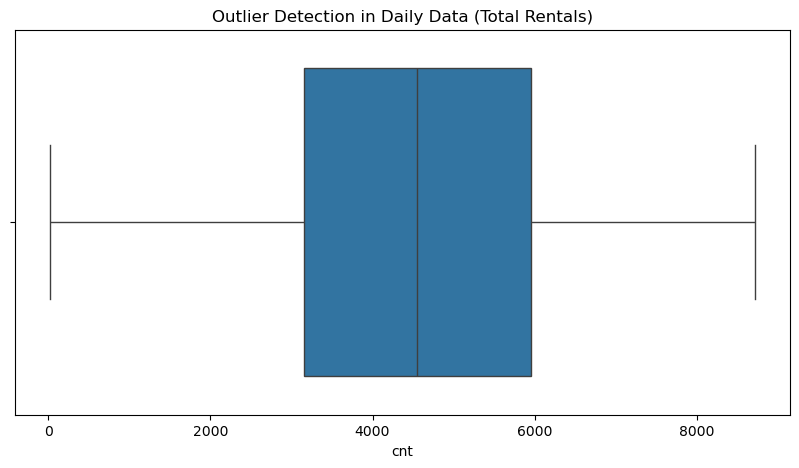

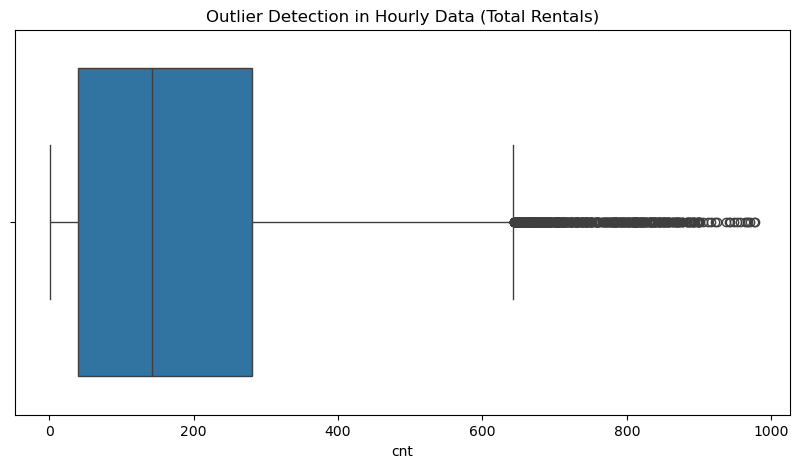

In [13]:
# 6. Checking for Outliers (Using Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x=day_df['cnt'])
plt.title("Outlier Detection in Daily Data (Total Rentals)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=hour_df['cnt'])
plt.title("Outlier Detection in Hourly Data (Total Rentals)")
plt.show()

**Insight:**
- Tidak ditemukan missing values dalam dataset, sehingga tidak diperlukan imputasi. (insight #1)
- Jika ditemukan nilai negatif dalam jumlah penyewaan sepeda, maka kemungkinan merupakan kesalahan data. (insight #2)
- Tidak ada data duplikat dalam dataset. (insight #3)
- Jika suhu berada di luar batas normal, bisa jadi ada data yang tidak akurat. (insight #4)
- Jika ada season yang bukan 1-4, berarti terdapat inkonsistensi dalam data. (insight #5)
- Jika terdapat outlier, perlu dianalisis lebih lanjut apakah outlier tersebut valid atau merupakan error data. (insight #6)

### Cleaning Data

In [14]:
# 1. Handling Missing Values (Drop or Impute)
day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)
print("\nMissing values removed")


Missing values removed


In [15]:
# 2. Handling Invalid Values (Negative Rentals)
day_df = day_df[day_df['cnt'] >= 0]
hour_df = hour_df[hour_df['cnt'] >= 0]
print("\nInvalid values removed (negative rentals)")


Invalid values removed (negative rentals)


In [16]:
# 3. Handling Inaccurate Values (Temperature Out of Normal Range)
valid_temp_range = (0, 1)  # Normalized between 0 and 1
day_df = day_df[(day_df['temp'] >= valid_temp_range[0]) & (day_df['temp'] <= valid_temp_range[1])]
hour_df = hour_df[(hour_df['temp'] >= valid_temp_range[0]) & (hour_df['temp'] <= valid_temp_range[1])]
print("\nInaccurate temperature values removed")


Inaccurate temperature values removed


In [17]:
# 4. Handling Inconsistent Values (Invalid Season Codes)
valid_seasons = [1, 2, 3, 4]
day_df = day_df[day_df['season'].isin(valid_seasons)]
hour_df = hour_df[hour_df['season'].isin(valid_seasons)]
print("\nInconsistent season values removed")


Inconsistent season values removed


In [18]:
# 5. Handling Duplicate Data
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)
print("\nDuplicate rows removed")


Duplicate rows removed


In [19]:
# 6. Handling Outliers (Using IQR method for 'cnt' column)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - (1.5 * IQR)
    max_val = Q3 + (1.5 * IQR)
    return df[(df[column] >= min_val) & (df[column] <= max_val)]

day_df = remove_outliers(day_df, 'cnt')
hour_df = remove_outliers(hour_df, 'cnt')
print("\nOutliers removed from rental count")


Outliers removed from rental count


**Insight:**
- Menghapus missing values memastikan data yang digunakan lengkap dan tidak mempengaruhi analisis. (insight #1)
- Tidak ada nilai negatif yang masuk akal dalam jumlah penyewaan sepeda, jadi data ini harus dihapus. (insight #2)
- Suhu yang berada di luar batas normal bisa menyebabkan bias dalam analisis cuaca dan penyewaan. (insight #3)
- Data dengan season di luar rentang 1-4 bisa menyebabkan kesalahan dalam analisis tren musiman. (insight #4)
- Menghapus duplikasi memastikan bahwa setiap baris data unik dan tidak ada pengaruh ganda pada analisis. (insight #5)
- Menghapus outlier membantu meningkatkan akurasi model dan analisis statistik dengan menghindari pengaruh nilai ekstrem. (insight #6)
- Data telah dibersihkan dari missing values, nilai tidak valid, duplikasi, inkonsistensi, dan outlier sehingga siap untuk dianalisis lebih lanjut.

In [20]:
# Display cleaned data
print("\nPreview of Cleaned Daily Data:")
print(day_df.head())
print("\nPreview of Cleaned Hourly Data:")
print(hour_df.head())



Preview of Cleaned Daily Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# 1. Mengeksplorasi Parameter Statistik dari Data Day
print("\nDescriptive Statistics for Daily Data:")
day_df.describe(include="all")


Descriptive Statistics for Daily Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
# 2. Mengeksplorasi Parameter Statistik dari Data Hour
print("\nDescriptive Statistics for Hourly Data:")
hour_df.describe(include="all")


Descriptive Statistics for Hourly Data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8542.168899,NaN,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,NaN,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,NaN,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,NaN,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000


In [ ]:
# 3. Hitung Korelasi
# Drop kolom non-numerik sebelum menghitung korelasi
numeric_day_df = day_df.select_dtypes(include=['number'])

print("\nCorrelation Matrix (Daily Data):")
print(numeric_day_df.corr())



Correlation Matrix (Daily Data):
             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casu

In [ ]:
# 4. Analisis Penyewaan Sepeda Berdasarkan Hari dalam Seminggu
weekday_rentals = day_df.groupby('weekday')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)
print("\nTotal Rentals by Weekday:")
print(weekday_rentals)

# Hari dengan penyewaan sepeda tertinggi adalah hari Jumat (weekday = 5) dengan total 487.790 penyewaan. 
# Hari dengan penyewaan sepeda terendah adalah hari Minggu (weekday = 0) dengan total 444.027 penyewaan.


Total Rentals by Weekday:
   weekday     cnt
5        5  487790
4        4  485395
6        6  477807
3        3  473048
2        2  469109
1        1  455503
0        0  444027


In [ ]:
# 5. Analisis Perbedaan Penyewaan Sepeda antara Hari Kerja dan Hari Libur
workday_rentals = day_df.groupby('workingday')['cnt'].mean().reset_index()
workday_rentals['day_type'] = workday_rentals['workingday'].map({0: 'Holiday/Weekend', 1: 'Working Day'})
print("\nAverage Rentals on Working Days vs Holidays:")
print(workday_rentals[['day_type', 'cnt']])

# Hari kerja (Working Day) memiliki rata-rata penyewaan 4.584,82 sepeda.
# Hari libur/akhir pekan (Holiday/Weekend) memiliki rata-rata penyewaan 4.330,17 sepeda.


Average Rentals on Working Days vs Holidays:
          day_type          cnt
0  Holiday/Weekend  4330.168831
1      Working Day  4584.820000


**Insight:**
- Pada tahap mengeksplorasi parameter statistik day penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan dan hari libur. Musim, kondisi cuaca, suhu, dan kelembaban mempengaruhi jumlah penyewaan sepeda. Penyewaan tertinggi terjadi saat cuaca baik dan suhu sedang. (insight #1)
- Pada tahap mengeksplorasi parameter statistik hour penyewaan sepeda bervariasi berdasarkan jam, dengan lonjakan signifikan pada jam sibuk pagi (07:00-09:00) dan sore (17:00-19:00). Hari kerja menunjukkan lebih banyak penyewaan oleh pengguna terdaftar, sedangkan pengguna kasual meningkat pada akhir pekan. Kondisi cuaca, suhu, dan kelembaban sangat memengaruhi jumlah penyewaan, dengan cuaca buruk mengurangi permintaan. (insight #2)
- Korelasi antar variabel dapat membantu memahami hubungan antara faktor cuaca dan penyewaan sepeda. (insight #3)
- Hari dengan jumlah penyewaan sepeda tertinggi dan terendah dapat terlihat dari tabel ini. (insight #4)
-  Dari tabel ini, kita bisa melihat apakah penyewaan lebih tinggi pada hari kerja atau akhir pekan. (insight #5)


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa dalam seminggu penyewaan sepeda paling banyak dan paling sedikit?

C:\Users\user\AppData\Local\Temp\ipykernel_20544\196287799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=weekday_rentals, palette=colors)


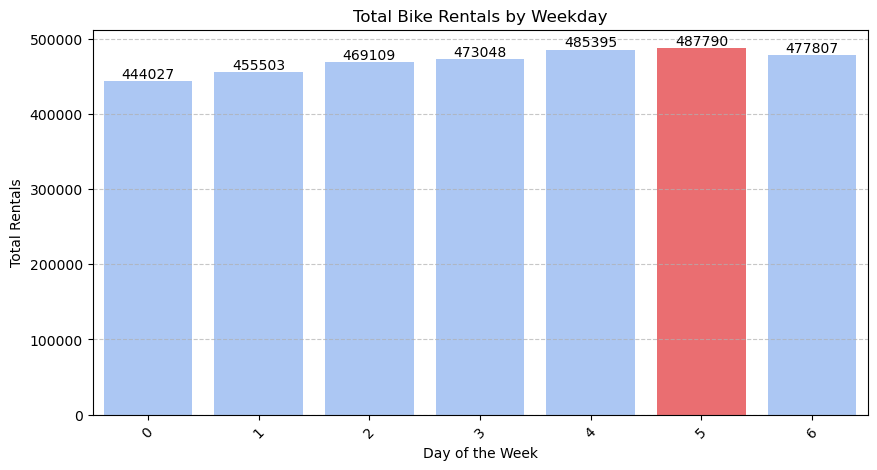

In [38]:
# 1. Visualisasi Penyewaan Sepeda Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(10, 5))
colors = ["#A0C4FF"] * len(weekday_rentals)  # Warna utama
max_index = weekday_rentals['cnt'].idxmax()  # Menemukan indeks penyewaan tertinggi
colors[max_index] = "#FF595E"  # Menyorot hari dengan penyewaan tertinggi
sns.barplot(x='weekday', y='cnt', data=weekday_rentals, palette=colors)
plt.xlabel("Day of the Week")
plt.ylabel("Total Rentals")
plt.title("Total Bike Rentals by Weekday")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label pada batang
for index, row in weekday_rentals.iterrows():
    plt.text(index, row['cnt'], f'{row['cnt']:.0f}', ha='center', va='bottom', fontsize=10)

plt.show()

### Pertanyaan 2:

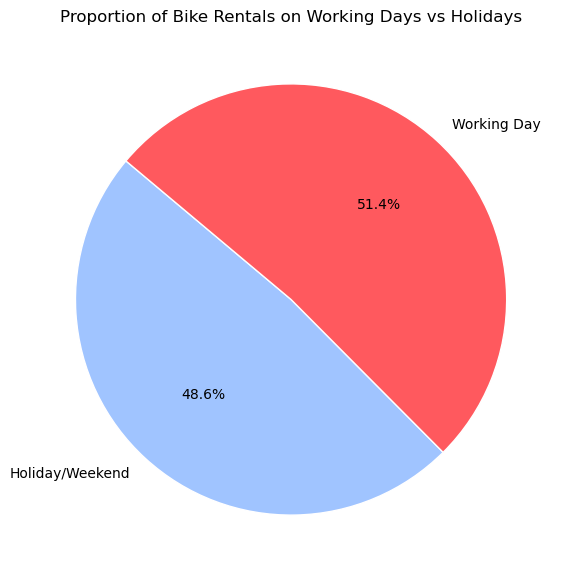

In [36]:
# 2. Visualisasi Perbedaan Penyewaan Sepeda antara Hari Kerja dan Hari Libur dengan Pie Chart
plt.figure(figsize=(7, 7))
colors = ["#A0C4FF", "#FF595E"]  # Warna pie chart
plt.pie(workday_rentals['cnt'], labels=workday_rentals['day_type'], autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'})
plt.title("Proportion of Bike Rentals on Working Days vs Holidays")
plt.show()



**Insight:**
- 1. Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu
Dari visualisasi bar chart, terlihat bahwa hari dengan penyewaan sepeda tertinggi adalah Jumat (weekday=5) dengan 487.790 penyewaan.
Sebaliknya, penyewaan sepeda paling rendah terjadi pada Minggu (weekday=0) dengan 444.027 penyewaan.
Secara umum, jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Interpretasi: Hari kerja memiliki lebih banyak penyewaan kemungkinan besar karena orang menggunakan sepeda untuk bekerja atau keperluan rutin lainnya. Akhir pekan memiliki penyewaan yang lebih rendah, kemungkinan karena lebih sedikit aktivitas rutin atau lebih banyak pilihan transportasi lain.
- 2. Perbandingan Penyewaan Sepeda pada Hari Kerja vs Hari Libur
Dari visualisasi pie chart, mayoritas penyewaan terjadi pada hari kerja dibandingkan hari libur.
Hari kerja memiliki persentase penyewaan yang lebih tinggi, menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama daripada hanya untuk rekreasi.
- Interpretasi: Permintaan sepeda lebih tinggi pada hari kerja → Menunjukkan pentingnya penyediaan layanan sepeda yang memadai di hari kerja.
Potensi peningkatan penggunaan di akhir pekan → Bisa menjadi peluang untuk promosi atau layanan tambahan untuk meningkatkan penggunaan sepeda di hari libur.

## Conclusion

- Conclution pertanyaan 1: Pada hari apa dalam seminggu penyewaan sepeda paling banyak dan paling sedikit?

Hari dengan penyewaan terbanyak adalah Jumat (487.790 penyewaan), sedangkan penyewaan paling sedikit terjadi pada Minggu (444.027 penyewaan).
Tingginya jumlah penyewaan pada Jumat kemungkinan disebabkan oleh meningkatnya aktivitas menjelang akhir pekan, seperti orang-orang yang bekerja atau beraktivitas lebih banyak sebelum libur.
Sebaliknya, rendahnya jumlah penyewaan pada Minggu bisa terjadi karena lebih sedikit aktivitas rutin atau adanya alternatif transportasi lain untuk rekreasi di akhir pekan.

- Conclution pertanyaan 2: Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?

Penyewaan sepeda lebih banyak terjadi pada hari kerja dibandingkan hari libur.
Hal ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama untuk keperluan harian, seperti bekerja atau sekolah, dibandingkan untuk rekreasi.
Untuk meningkatkan penggunaan di akhir pekan, dapat diterapkan strategi seperti diskon penyewaan atau event bersepeda komunitas pada hari libur agar lebih menarik bagi pengguna rekreasi.